In [11]:
#CNN Model to classify images of different types of flowers.
#The dataset used is a combination of 5 different types of flowers.


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import shutil
from sklearn.model_selection import train_test_split
import random
import matplotlib.image as mpimg
from keras.utils import to_categorical

In [2]:
base_dir = "D:/Studies/NTI - machine learning on cloud/Machine Learning/flower_photos" 

In [3]:
classes = os.listdir(base_dir)

# Create 'train' and 'validation' subfolders
train_folder = os.path.join(base_dir, 'train')
val_folder = os.path.join(base_dir, 'validation')
os.makedirs(base_dir, exist_ok=True)
os.makedirs(base_dir, exist_ok=True)

# Loop through each class folder
for class_name in classes:
    class_folder = os.path.join(base_dir, class_name)
    if os.path.isdir(class_folder):
        images = os.listdir(class_folder)
        
        # Split images into train and validation sets
        train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)
        
        # Create subfolders for the class within 'train' and 'validation'
        class_train_folder = os.path.join(train_folder, class_name)
        class_val_folder = os.path.join(val_folder, class_name)
        os.makedirs(class_train_folder, exist_ok=True)
        os.makedirs(class_val_folder, exist_ok=True)
        
        # Move images to respective subfolders
        for img in train_images:
            shutil.move(os.path.join(class_folder, img), os.path.join(class_train_folder, img))
        for img in val_images:
            shutil.move(os.path.join(class_folder, img), os.path.join(class_val_folder, img))

In [3]:
train_dir = os.path.join(base_dir, 'train')                                      #to create a path to the folder where the training images are stored.
val_dir = os.path.join(base_dir, 'validation')                                   #to create a path to the folder where the validation images are stored.

In [4]:
train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_roses_dir = os.path.join(train_dir, 'roses')
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')
train_tulips_dir = os.path.join(train_dir, 'tulips')


val_daisy_dir = os.path.join(val_dir, 'daisy')
val_dandelion_dir = os.path.join(val_dir, 'dandelion')
val_roses_dir = os.path.join(val_dir, 'roses')
val_sunflowers_dir = os.path.join(val_dir, 'sunflowers')
val_tulips_dir = os.path.join(val_dir, 'tulips')

In [5]:
total_train = len(os.listdir(train_daisy_dir)) + len(os.listdir(train_dandelion_dir)) + len(os.listdir(train_roses_dir)) + len(os.listdir(train_sunflowers_dir)) + len(os.listdir(train_tulips_dir))
total_val = len(os.listdir(val_daisy_dir)) + len(os.listdir(val_dandelion_dir)) + len(os.listdir(val_roses_dir)) + len(os.listdir(val_sunflowers_dir)) + len(os.listdir(val_tulips_dir))
print("Total training images:", total_train)
print("Total validation images:", total_val)

Total training images: 2934
Total validation images: 736


In [6]:
print(len(os.listdir(train_daisy_dir)))
#print(len(os.listdir(train_dandelion_dir)))
print(len(os.listdir(train_roses_dir)))
print(len(os.listdir(train_sunflowers_dir)))
print(len(os.listdir(train_tulips_dir)))
print(len(os.listdir(val_daisy_dir)))
#print(len(os.listdir(val_dandelion_dir)))
print(len(os.listdir(val_roses_dir)))
print(len(os.listdir(val_sunflowers_dir)))
print(len(os.listdir(val_tulips_dir)))

506
512
559
639
127
129
140
160


In [7]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,        # Normalize pixel values to [0, 1]
    rotation_range=40,      # Randomly rotate images
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2, # Randomly shift images vertically
    shear_range=0.2,        # Apply shear transformations
    zoom_range=0.2,         # Apply zoom transformations
    horizontal_flip=True)   # Flip images horizontally


val_datagen = ImageDataGenerator(rescale=1.0/255) 


train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='categorical',
    seed=42,
    shuffle=True
)

val_data = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='categorical',
    seed=42,
    shuffle=True
)


Found 2934 images belonging to 5 classes.
Found 736 images belonging to 5 classes.


In [8]:
train_labels1h = to_categorical(train_data.labels, num_classes=5)
val_labels1h = to_categorical(val_data.labels, num_classes=5)

for data_batch, labels_batch in train_data:
    print("Training data batch shape:", data_batch.shape)
    print("Training labels batch shape:", labels_batch.shape)
    break  # Print the shape of the first batch only for brevity

for data_batch, labels_batch in val_data:
    print("Validation data batch shape:", data_batch.shape)
    print("Validation labels batch shape:", labels_batch.shape)
    break 

Training data batch shape: (100, 150, 150, 3)
Training labels batch shape: (100, 5)
Validation data batch shape: (100, 150, 150, 3)
Validation labels batch shape: (100, 5)


In [9]:
#Now to building the model:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation = 'relu' , input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5),                                     #this means 50% of the neurons will be turned off randomly.
    
    tf.keras.layers.Flatten(),                                        #i can't have a dense layer without a flatten layer.
    
    tf.keras.layers.Dense(512, activation = 'relu'),
    
    tf.keras.layers.Dense(5, 'softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [10]:
for inputs, labels in train_data:
    print("Input shape:", inputs.shape)
    print("Label shape:", labels.shape)

Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150, 3)
Label shape: (100, 5)
Input shape: (100, 150, 150,

KeyboardInterrupt: 

In [16]:
#model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = 'adam', metrics = ['accuracy'])
#from_logits=True: the output of the model is not normalized
model.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])

In [17]:
batch_size = 100
history = model.fit_generator(train_data, epochs = 10,validation_data = val_data)
#history = model.fit(train_data,
#                    steps_per_epoch=int(np.ceil(total_train/batch_size)),
#                    epochs=10,
#                    validation_data=val_data,
#                    validation_steps= int(np.ceil(total_val/batch_size))
#)

C:\Users\nabaa\AppData\Local\Temp\ipykernel_21300\3136876635.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, epochs = 10,validation_data = val_data)


Epoch 1/10
30/30 [==============================] - 66s 2s/step - loss: 1.5005 - accuracy: 0.3067 - val_loss: 1.2626 - val_accuracy: 0.4579
Epoch 2/10
30/30 [==============================] - 43s 1s/step - loss: 1.1919 - accuracy: 0.5014 - val_loss: 1.0797 - val_accuracy: 0.5774
Epoch 3/10
30/30 [==============================] - 42s 1s/step - loss: 1.0439 - accuracy: 0.5746 - val_loss: 1.0783 - val_accuracy: 0.5829
Epoch 4/10
30/30 [==============================] - 42s 1s/step - loss: 0.9675 - accuracy: 0.6094 - val_loss: 0.9298 - val_accuracy: 0.6196
Epoch 5/10
30/30 [==============================] - 41s 1s/step - loss: 0.9499 - accuracy: 0.6183 - val_loss: 0.9997 - val_accuracy: 0.6168
Epoch 6/10
30/30 [==============================] - 41s 1s/step - loss: 0.9010 - accuracy: 0.6476 - val_loss: 0.8783 - val_accuracy: 0.6345
Epoch 7/10
30/30 [==============================] - 41s 1s/step - loss: 0.8658 - accuracy: 0.6428 - val_loss: 0.8102 - val_accuracy: 0.6875
Epoch 8/10
30/30 [==

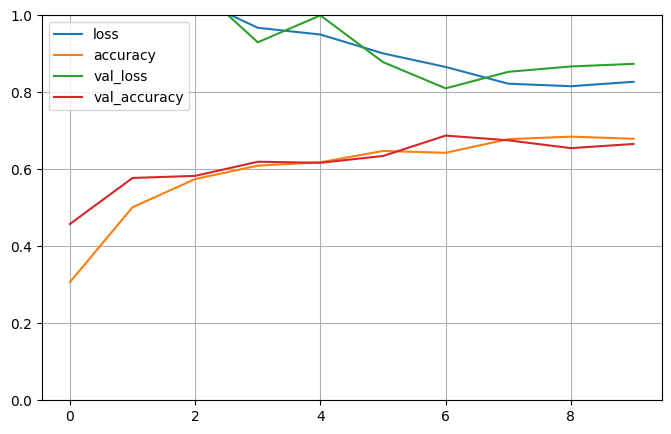

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

C:\Users\nabaa\AppData\Local\Temp\ipykernel_21300\1286279393.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, epochs = 10,validation_data = val_data)


Epoch 1/10
30/30 [==============================] - 43s 1s/step - loss: 0.7662 - accuracy: 0.7127 - val_loss: 0.7568 - val_accuracy: 0.6970
Epoch 2/10
30/30 [==============================] - 42s 1s/step - loss: 0.7529 - accuracy: 0.7065 - val_loss: 0.7272 - val_accuracy: 0.7201
Epoch 3/10
30/30 [==============================] - 41s 1s/step - loss: 0.7281 - accuracy: 0.7219 - val_loss: 0.7365 - val_accuracy: 0.7079
Epoch 4/10
30/30 [==============================] - 42s 1s/step - loss: 0.7127 - accuracy: 0.7243 - val_loss: 0.7609 - val_accuracy: 0.7065
Epoch 5/10
30/30 [==============================] - 42s 1s/step - loss: 0.7197 - accuracy: 0.7100 - val_loss: 0.6849 - val_accuracy: 0.7364
Epoch 6/10
30/30 [==============================] - 42s 1s/step - loss: 0.7067 - accuracy: 0.7280 - val_loss: 0.7126 - val_accuracy: 0.7323
Epoch 7/10
30/30 [==============================] - 41s 1s/step - loss: 0.6793 - accuracy: 0.7396 - val_loss: 0.7042 - val_accuracy: 0.7527
Epoch 8/10
30/30 [==

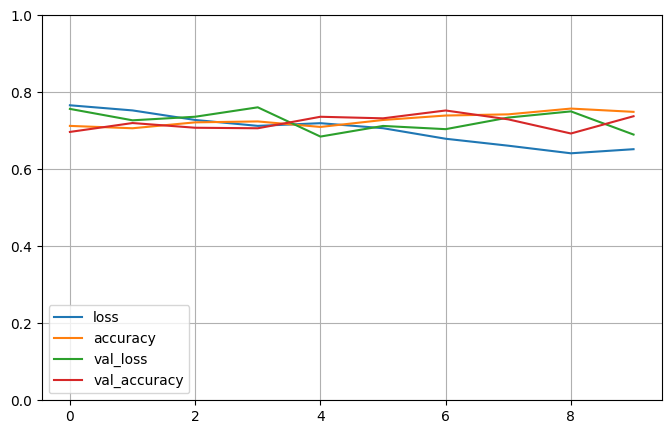

In [19]:
history = model.fit_generator(train_data, epochs = 10,validation_data = val_data)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

C:\Users\nabaa\AppData\Local\Temp\ipykernel_21300\3958770901.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data, epochs = 40,validation_data = val_data)


Epoch 1/40
30/30 [==============================] - 43s 1s/step - loss: 0.6653 - accuracy: 0.7369 - val_loss: 0.8031 - val_accuracy: 0.7052
Epoch 2/40
30/30 [==============================] - 43s 1s/step - loss: 0.6344 - accuracy: 0.7532 - val_loss: 0.6440 - val_accuracy: 0.7473
Epoch 3/40
30/30 [==============================] - 43s 1s/step - loss: 0.6083 - accuracy: 0.7669 - val_loss: 0.6802 - val_accuracy: 0.7337
Epoch 4/40
30/30 [==============================] - 42s 1s/step - loss: 0.6107 - accuracy: 0.7679 - val_loss: 0.7181 - val_accuracy: 0.7486
Epoch 5/40
30/30 [==============================] - 43s 1s/step - loss: 0.5961 - accuracy: 0.7720 - val_loss: 0.6996 - val_accuracy: 0.7310
Epoch 6/40
30/30 [==============================] - 42s 1s/step - loss: 0.5912 - accuracy: 0.7672 - val_loss: 0.6896 - val_accuracy: 0.7405
Epoch 7/40
30/30 [==============================] - 42s 1s/step - loss: 0.5694 - accuracy: 0.7836 - val_loss: 0.7755 - val_accuracy: 0.7160
Epoch 8/40
30/30 [==

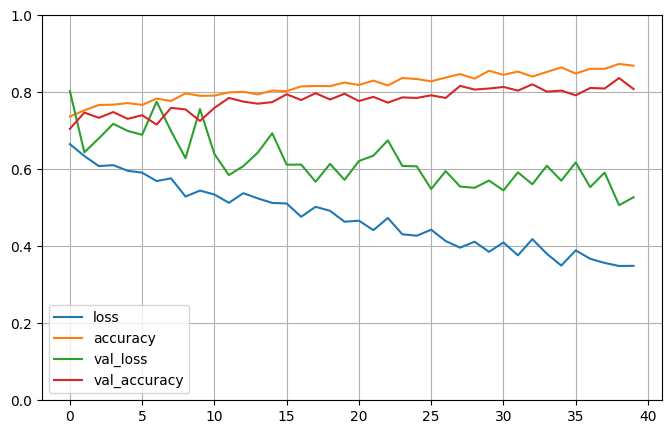

In [20]:
history = model.fit_generator(train_data, epochs = 40,validation_data = val_data)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
########the code can stop here since adding the softmax at the last layer made a difference and imporoved the model's performance ########

In [30]:
#since the results are bad, we will try to use a pre-trained model anda add our last few layers to it.
#we also will try to reduce the dropout to 0.2.
from keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = keras.models.Sequential()
model.add(base_model)
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(5))  # 5 classes for flowers

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
batch_size = 100
history = model.fit(train_data,steps_per_epoch = int(np.ceil(total_train/batch_size)),epochs = 10,validation_data = val_data,validation_steps = int(np.ceil(total_val/batch_size)))

Epoch 1/10
30/30 [==============================] - 456s 15s/step - loss: 6.8471 - accuracy: 0.2106 - val_loss: 10.2709 - val_accuracy: 0.1902
Epoch 2/10
30/30 [==============================] - 449s 15s/step - loss: 10.2676 - accuracy: 0.1769 - val_loss: 10.2709 - val_accuracy: 0.1726
Epoch 3/10
30/30 [==============================] - 448s 15s/step - loss: 10.2675 - accuracy: 0.1725 - val_loss: 10.2709 - val_accuracy: 0.1726
Epoch 4/10
30/30 [==============================] - 449s 15s/step - loss: 10.2675 - accuracy: 0.1725 - val_loss: 10.2709 - val_accuracy: 0.1726
Epoch 5/10
30/30 [==============================] - 467s 16s/step - loss: 10.2675 - accuracy: 0.1725 - val_loss: 10.2709 - val_accuracy: 0.1726
Epoch 6/10
30/30 [==============================] - 467s 16s/step - loss: 10.2675 - accuracy: 0.1725 - val_loss: 10.2709 - val_accuracy: 0.1726
Epoch 7/10
30/30 [==============================] - 490s 16s/step - loss: 10.2675 - accuracy: 0.1725 - val_loss: 10.2709 - val_accuracy: 

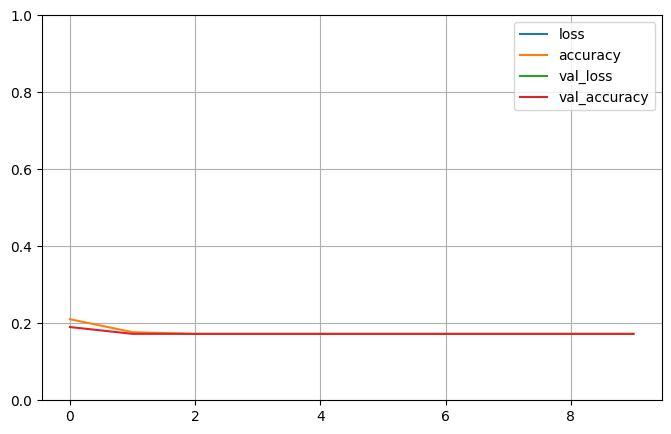

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()